## Problem Sheet 01

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import cv2 as cv
import math

### Exercise 1.1

#### Basic Transformations and Visualizations.

In [22]:
df= pd.read_csv("mpg-data.csv")
df.shape

(234, 11)

In [23]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
df["class"].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [9]:
df.manufacturer.value_counts()

manufacturer
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: count, dtype: int64

In [47]:

#regression_result= {}
for classes in df["class"].unique():
    subset= df[df["class"]== classes]
    X= subset[["hwy"]].values
    y= subset["displ"].values
    model= LinearRegression().fit(X,y)
    slope= model.coef_[0]
    intercept=model.intercept_
    print(f"Class {classes:10} | slope= {slope: 0.3}, intercept = {intercept: 0.3}")

Class compact    | slope= -0.0662, intercept =  4.2
Class midsize    | slope= -0.175, intercept =  7.69
Class suv        | slope= -0.234, intercept =  8.69
Class 2seater    | slope= -0.05, intercept =  7.4
Class minivan    | slope= -0.0485, intercept =  4.48
Class pickup     | slope= -0.227, intercept =  8.26
Class subcompact | slope= -0.142, intercept =  6.65


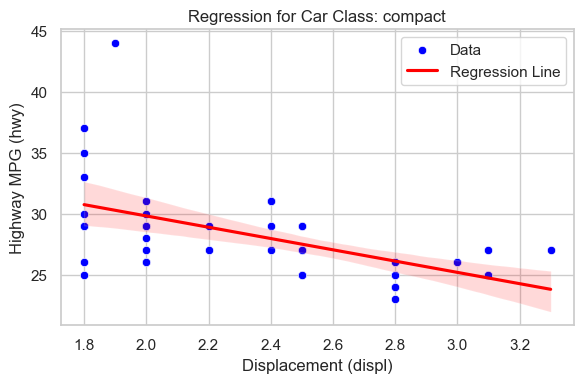

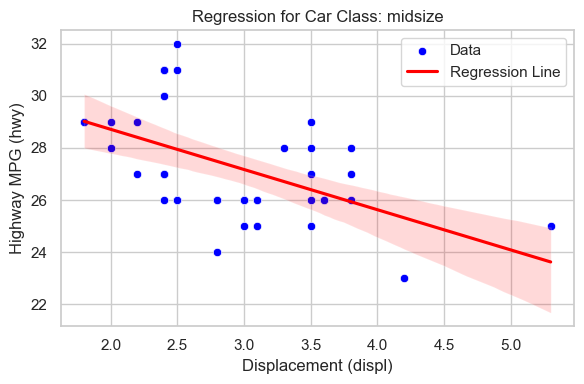

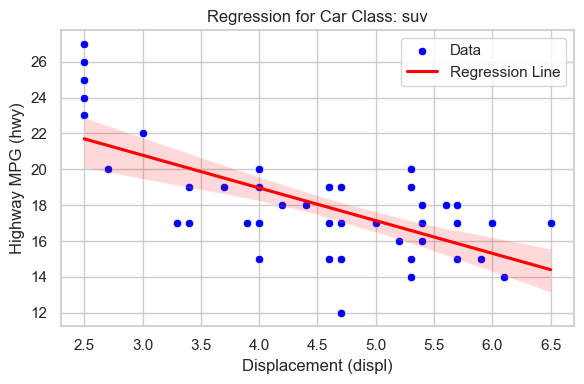

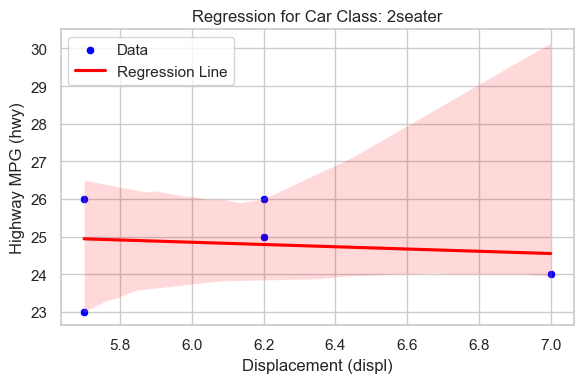

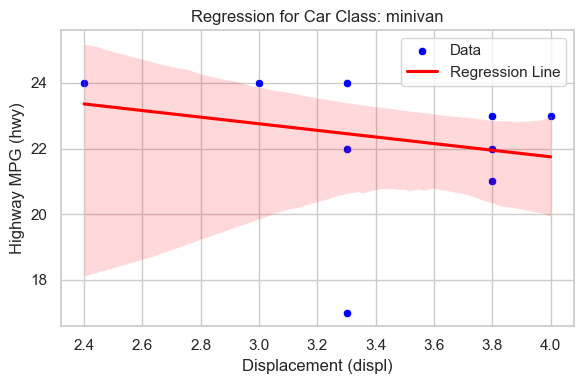

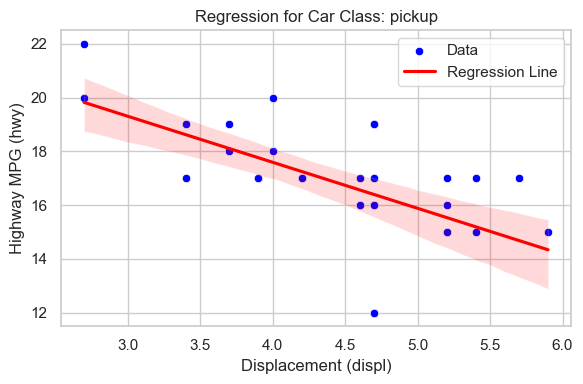

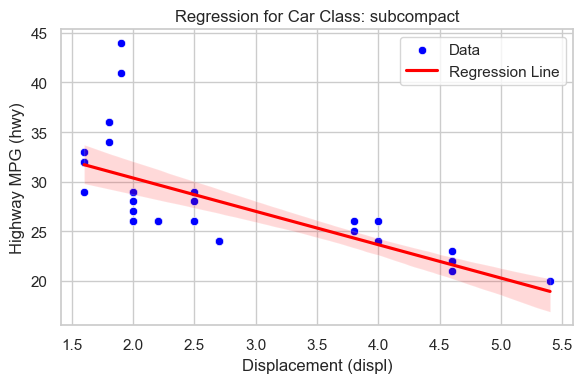

In [ ]:
# Loop through each unique car class
for i in df["class"].unique():
    sub = df[df["class"] == i]
    
    plt.figure(figsize=(6, 4))
    # Scatter plot
    sns.scatterplot(data=sub, x="displ", y="hwy", color="blue", label="Data")
    sns.regplot(data=sub, x="displ", y="hwy", scatter=False, color="red", label="Regression Line")
    
    plt.title(f"Regression for Car Class: {i}")
    plt.xlabel("Displacement (displ)")
    plt.ylabel("Highway MPG (hwy)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()


In [59]:
group_median=df.groupby(["class", "year"])["hwy"].median().reset_index()

result = group_median.rename(columns={"hwy": "median_hwy"})
print(result)


         class  year  median_hwy
0      2seater  1999        24.5
1      2seater  2008        25.0
2      compact  1999        26.0
3      compact  2008        29.0
4      midsize  1999        26.0
5      midsize  2008        28.0
6      minivan  1999        22.0
7      minivan  2008        23.0
8       pickup  1999        17.0
9       pickup  2008        17.0
10  subcompact  1999        26.0
11  subcompact  2008        26.5
12         suv  1999        17.0
13         suv  2008        18.0


### Exercise 1.2

#### Algorithm Runtimes

In [3]:
data=pd.read_csv('runtimes.csv',comment='#')
print(data.head())

          algo     size        time1       time2       time3       time4  \
0  distributed     4096     3.736606    2.133074    1.673441    1.515788   
1  distributed    16384    14.792794    7.894031    5.681171    4.597697   
2  distributed    65536    59.123347   30.762486   21.436608   16.510129   
3  distributed   262144   240.747448  124.448679   85.384094   64.732369   
4  distributed  1048576  1097.788352  567.038172  383.563617  290.182877   

        time5  
0    1.475265  
1    3.988286  
2   13.637740  
3   53.544233  
4  242.494498  


In [4]:
# Create a mapping for renaming columns for the number of threads. This dictionary's keys are old names and values are new names
thread_col_names = {f'time{i}': f'Thread_{i}' for i in range(1,6)}  

# Using pandas' melt function to reshape the DataFrame from wide to long format. 
data_melt = pd.melt(data, id_vars=['algo', 'size'], value_vars=['time1', 'time2', 'time3', 'time4', 'time5'], 
                  var_name='Thread', value_name='Runtime').dropna()

# Now we replace the old column names (Thread) with the new column names defined in thread_col_names using .replace method
data_melt['Thread'] = data_melt['Thread'].replace(thread_col_names)

# Using the pandas' .astype() method to set the appropriate data type to each column.
# We set the 'algo' and 'Thread' columns as strings (object), the 'size' column as integer and the 'Runtime' column as float.
data_melt = data_melt.astype({"algo": str, "size": int, "Thread": str, "Runtime": float})

# Print out the first 5 rows of the reshaped DataFrame using .head() method. This helps us verify the transformations.
data_melt.head()

,algo,size,Thread,Runtime
0,distributed,4096,Thread_1,3.736606
1,distributed,16384,Thread_1,14.792794
2,distributed,65536,Thread_1,59.123347
3,distributed,262144,Thread_1,240.747448
4,distributed,1048576,Thread_1,1097.788352


Text(0.5, 1.0, 'Distribution Algorithm')

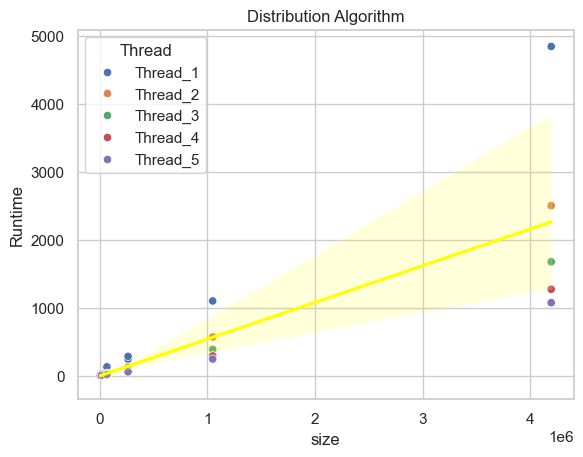

In [51]:
sns.scatterplot(data=data_melt, x="size", y="Runtime", hue="Thread")
sns.regplot(data=data_melt, x="size", y="Runtime", scatter=False, color="Yellow")
sns.set_theme(style="whitegrid")
plt.title("Distribution Algorithm")

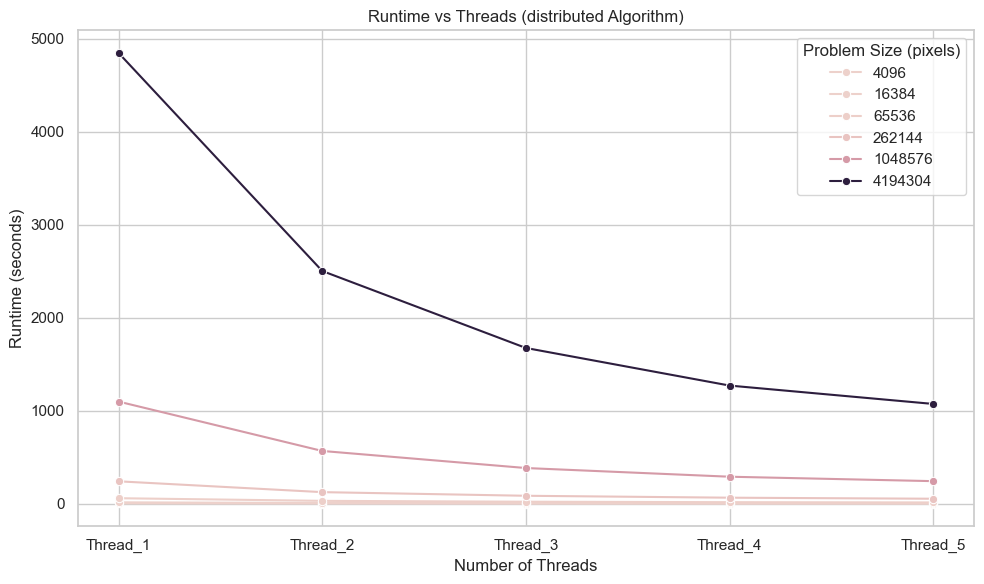

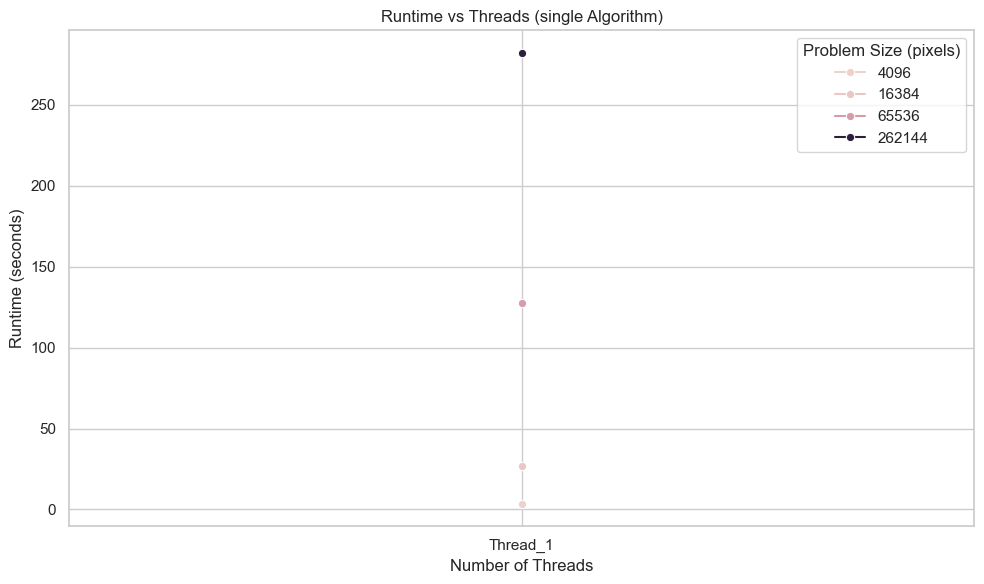

In [ ]:
# Filter for distributed version
for algo_data in data_melt["algo"].unique():
    subset = data_melt[data_melt["algo"] == algo_data]


    plt.figure(figsize=(10, 6))
    sns.lineplot(data=subset, x="Thread", y="Runtime", hue="size", marker="o")

    plt.title(f"Runtime vs Threads ({algo_data} Algorithm)")
    plt.xlabel("Number of Threads")
    plt.ylabel("Runtime (seconds)")
    plt.legend(title="Problem Size (pixels)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Exercise 1.3
#### Hue rotation.

In [9]:
img= cv.imread("BlueAndYellowMacaw_AraArarauna.jpg")

(np.float64(-0.5), np.float64(4271.5), np.float64(2847.5), np.float64(-0.5))

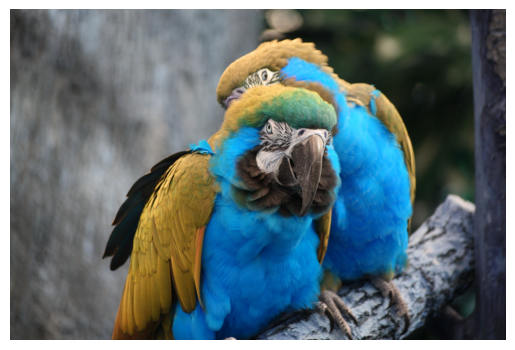

In [10]:
plt.Figure(figsize=(12,8))
plt.imshow(img)
plt.axis(False)

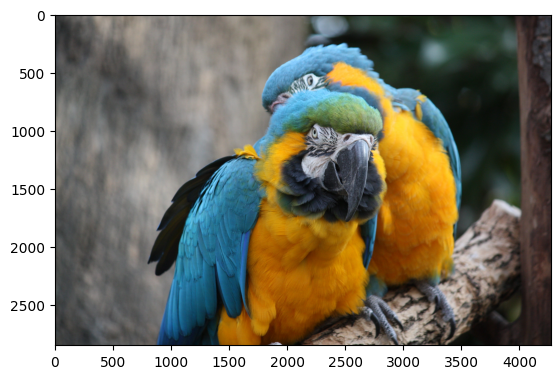

In [ ]:
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [ ]:

def rotate_hue(image_rgb, phi):
    """
    Rotate the hue of an RGB image by an angle phi in [0, 2π).
    """
    # Convert to HSV
    hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV).astype(np.float32)

    # Hue range in OpenCV is [0, 180]; map φ ∈ [0, 2π) → [0, 180)
    hue_shift = (phi / (2 * np.pi)) * 180

    # Apply rotation with wrap-around
    hsv[..., 0] = (hsv[..., 0] + hue_shift) % 180

    # Convert back to uint8 and RGB
    hsv = np.clip(hsv, 0, 255).astype(np.uint8)
    rotated_rgb = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)

    return rotated_rgb

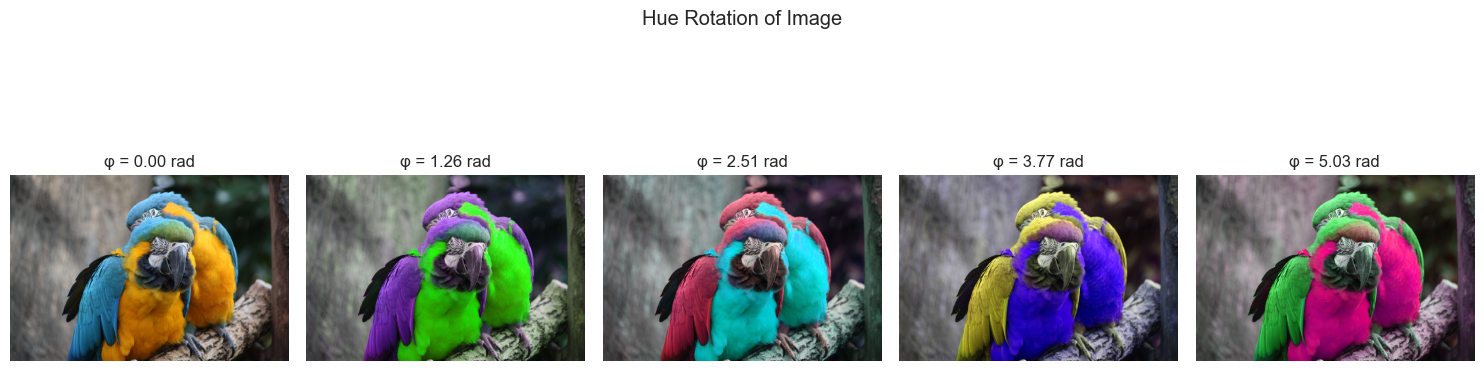

In [54]:
# Define angles: 0, 2π/5, 4π/5, 6π/5, 8π/5
angles = [2 * np.pi * k / 5 for k in range(5)]

# Plot
plt.figure(figsize=(15, 5))
for i, phi in enumerate(angles):
    rotated = rotate_hue(image_rgb, phi)
    plt.subplot(1, 5, i+1)
    plt.imshow(rotated)
    plt.title(f"φ = {phi:.2f} rad")
    plt.axis('off')

plt.suptitle("Hue Rotation of Image")
plt.tight_layout()
plt.show()
